#Dataset Download

In [14]:
!pip install gdown
!pip install hyperactive

     |████████████████████████████████| 61kB 1.8MB/s 


In [15]:
#Download Dataset
!gdown https://drive.google.com/uc?id=1vlZpEth-He87cuAKLWAsPOD2ql_x5cCk

#unzip downloaded data
!unzip tomatoleaf.zip

Streaming output truncated to the last 5000 lines.
  inflating: tomato/train/Tomato___Target_Spot/0044d10f-7062-4655-8abd-9fffc5b2f152___Com.G_TgS_FL 7908.JPG  
  inflating: tomato/train/Tomato___Target_Spot/00854623-ba28-446d-a1d5-03c0ae3f99d9___Com.G_TgS_FL 7949.JPG  
  inflating: tomato/train/Tomato___Target_Spot/0118c27a-f34a-41e1-8b2f-d2c564f83c5c___Com.G_TgS_FL 0013.JPG  
  inflating: tomato/train/Tomato___Target_Spot/0118ed61-b135-45be-ad81-7e2d54203be4___Com.G_TgS_FL 8241.JPG  
  inflating: tomato/train/Tomato___Target_Spot/0197df47-a9cb-4b6c-b72c-ac0e9af6d135___Com.G_TgS_FL 0779.JPG  
  inflating: tomato/train/Tomato___Target_Spot/025510ac-15db-4861-b02b-21da82161100___Com.G_TgS_FL 0952.JPG  
  inflating: tomato/train/Tomato___Target_Spot/0288164e-d6cf-4215-b593-7b581308a4cf___Com.G_TgS_FL 9777.JPG  
  inflating: tomato/train/Tomato___Target_Spot/03002b91-afe3-4c72-86b8-31028913434e___Com.G_TgS_FL 0682.JPG  
  inflating: tomato/train/Tomato___Target_Spot/0352b802-bcae-4ced-b48

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


#Preprosesing

In [17]:
import pandas as pd
import numpy as np
import os
import cv2

np.random.seed(1)
from tensorflow.compat.v1 import set_random_seed
set_random_seed(2)


import albumentations as albu
from albumentations import Compose, ShiftScaleRotate, Resize
from albumentations.pytorch import ToTensor

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

from sklearn.metrics import confusion_matrix
import itertools
from sklearn.metrics import classification_report

import shutil

import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
IMAGE_HEIGHT = 128
IMAGE_WIDTH = 128
IMAGE_CHANNELS = 3


In [19]:
base_train = "/content/tomato/train"

Bacterial_spot = os.listdir(base_train + "/Tomato___Bacterial_spot")
Early_blight = os.listdir(base_train + "/Tomato___Early_blight")
Late_blight = os.listdir(base_train + "/Tomato___Late_blight")
Leaf_mold = os.listdir(base_train + "/Tomato___Leaf_Mold")
Septoria_leaf_spot = os.listdir(base_train + "/Tomato___Septoria_leaf_spot")
Spider_mites = os.listdir(base_train + "/Tomato___Spider_mites Two-spotted_spider_mite")
Target_Spot = os.listdir(base_train + "/Tomato___Target_Spot")
Tomato_Yellow_Leaf_Curl_Virus = os.listdir(base_train + "/Tomato___Tomato_Yellow_Leaf_Curl_Virus")
Mosaic_virus = os.listdir(base_train + "/Tomato___Tomato_mosaic_virus")
Healthy = os.listdir(base_train + "/Tomato___healthy")

print(len(Bacterial_spot))
print(len(Early_blight))
print(len(Late_blight))
print(len(Leaf_mold))
print(len(Septoria_leaf_spot))
print(len(Spider_mites))
print(len(Target_Spot))
print(len(Tomato_Yellow_Leaf_Curl_Virus))
print(len(Mosaic_virus))
print(len(Healthy))

1000
1000
1000
1000
1000
1000
1000
1000
1000
1000


In [20]:
base_train = "/content/tomato/val"

Bacterial_spot_val = os.listdir(base_train + "/Tomato___Bacterial_spot")
Early_blight_val = os.listdir(base_train + "/Tomato___Early_blight")
Late_blight_val = os.listdir(base_train + "/Tomato___Late_blight")
Leaf_mold_val = os.listdir(base_train + "/Tomato___Leaf_Mold")
Septoria_leaf_spot_val = os.listdir(base_train + "/Tomato___Septoria_leaf_spot")
Spider_mites_val = os.listdir(base_train + "/Tomato___Spider_mites Two-spotted_spider_mite")
Target_Spot_val = os.listdir(base_train + "/Tomato___Target_Spot")
Tomato_Yellow_Leaf_Curl_Virus_val = os.listdir(base_train + "/Tomato___Tomato_Yellow_Leaf_Curl_Virus")
Mosaic_virus_val = os.listdir(base_train + "/Tomato___Tomato_mosaic_virus")
Healthy_val = os.listdir(base_train + "/Tomato___healthy")

print(len(Bacterial_spot_val))
print(len(Early_blight_val))
print(len(Late_blight_val))
print(len(Leaf_mold_val))
print(len(Septoria_leaf_spot_val))
print(len(Spider_mites_val))
print(len(Target_Spot_val))
print(len(Tomato_Yellow_Leaf_Curl_Virus_val))
print(len(Mosaic_virus_val))
print(len(Healthy))

100
100
100
100
100
100
100
100
100
1000


##Data train

In [21]:
# Create the train and val sets

df_Bacterial_spot_train = pd.DataFrame(Bacterial_spot, columns=['image'])
df_Bacterial_spot_train['target'] = 'Bacterial_spot'

df_Early_blight_train = pd.DataFrame(Early_blight, columns=['image'])
df_Early_blight_train['target'] = 'Early_blight'

df_Late_blight_train = pd.DataFrame(Late_blight, columns=['image'])
df_Late_blight_train['target'] = 'Late_blight'

df_Leaf_mold_train = pd.DataFrame(Leaf_mold, columns=['image'])
df_Leaf_mold_train['target'] = 'Leaf_mold'

df_Septoria_leaf_spot_train = pd.DataFrame(Septoria_leaf_spot, columns=['image'])
df_Septoria_leaf_spot_train['target'] = 'Septoria_leaf_spot'

df_Spider_mites_train = pd.DataFrame(Spider_mites, columns=['image'])
df_Spider_mites_train['target'] = 'Spider_mites'

df_Target_Spot_train = pd.DataFrame(Target_Spot, columns=['image'])
df_Target_Spot_train['target'] = 'Target_Spot'

df_Tomato_Yellow_Leaf_Curl_Virus_train = pd.DataFrame(Tomato_Yellow_Leaf_Curl_Virus, columns=['image'])
df_Tomato_Yellow_Leaf_Curl_Virus_train['target'] = 'Tomato_Yellow_Leaf_Curl_Virus'

df_Mosaic_virus_train = pd.DataFrame(Mosaic_virus, columns=['image'])
df_Mosaic_virus_train['target'] = 'Mosaic_virus'

df_Healthy_train = pd.DataFrame(Healthy, columns=['image'])
df_Healthy_train['target'] = 'Healthy'



# Sample 5 validation images from each class


print(len(df_Bacterial_spot_train))
print(len(df_Early_blight_train))
print(len(df_Late_blight_train))
print(len(df_Leaf_mold_train))
print(len(df_Septoria_leaf_spot_train))
print(len(df_Spider_mites_train))
print(len(df_Target_Spot_train))
print(len(df_Tomato_Yellow_Leaf_Curl_Virus_train))
print(len(df_Mosaic_virus_train))
print(len(df_Healthy_train))

1000
1000
1000
1000
1000
1000
1000
1000
1000
1000


##Data validasi

In [22]:
# Create the train and val sets

df_Bacterial_spot_val = pd.DataFrame(Bacterial_spot_val, columns=['image'])
df_Bacterial_spot_val['target'] = 'Bacterial_spot'

df_Early_blight_val = pd.DataFrame(Early_blight_val, columns=['image'])
df_Early_blight_val['target'] = 'Early_blight'

df_Late_blight_val = pd.DataFrame(Late_blight_val, columns=['image'])
df_Late_blight_val['target'] = 'Late_blight'

df_Leaf_mold_val = pd.DataFrame(Leaf_mold_val, columns=['image'])
df_Leaf_mold_val['target'] = 'Leaf_mold'

df_Septoria_leaf_spot_val = pd.DataFrame(Septoria_leaf_spot_val, columns=['image'])
df_Septoria_leaf_spot_val['target'] = 'Septoria_leaf_spot'

df_Spider_mites_val = pd.DataFrame(Spider_mites_val, columns=['image'])
df_Spider_mites_val['target'] = 'Spider_mites'

df_Target_Spot_val = pd.DataFrame(Target_Spot_val, columns=['image'])
df_Target_Spot_val['target'] = 'Target_Spot'

df_Tomato_Yellow_Leaf_Curl_Virus_val = pd.DataFrame(Tomato_Yellow_Leaf_Curl_Virus_val, columns=['image'])
df_Tomato_Yellow_Leaf_Curl_Virus_val['target'] = 'Tomato_Yellow_Leaf_Curl_Virus'

df_Mosaic_virus_val = pd.DataFrame(Mosaic_virus_val, columns=['image'])
df_Mosaic_virus_val['target'] = 'Mosaic_virus'

df_Healthy_val = pd.DataFrame(Healthy_val, columns=['image'])
df_Healthy_val['target'] = 'Healthy'



# Sample 5 validation images from each class


print(len(df_Bacterial_spot_val))
print(len(df_Early_blight_val))
print(len(df_Late_blight_val))
print(len(df_Leaf_mold_val))
print(len(df_Septoria_leaf_spot_val))
print(len(df_Spider_mites_val))
print(len(df_Target_Spot_val))
print(len(df_Tomato_Yellow_Leaf_Curl_Virus_val))
print(len(df_Mosaic_virus_val))
print(len(df_Healthy_val))

100
100
100
100
100
100
100
100
100
100


In [23]:
# Create df_data, df_train and df_val


# df_data = pd.concat([df_Bacterial_spot, \
#                      df_Early_blight, \
#                      df_Late_blight, \
#                      df_Leaf_mold, \
#                      df_Septoria_leaf_spot, \
#                      df_Spider_mites, \
#                      df_Target_Spot, \
#                      df_Tomato_Yellow_Leaf_Curl_Virus, \
#                      df_Mosaic_virus, \
#                      df_Healthy], axis=0).reset_index(drop=True)


df_train = pd.concat([df_Bacterial_spot_train, \
                     df_Early_blight_train, \
                     df_Late_blight_train, \
                     df_Leaf_mold_train, \
                     df_Septoria_leaf_spot_train, \
                     df_Spider_mites_train, \
                     df_Target_Spot_train, \
                     df_Tomato_Yellow_Leaf_Curl_Virus_train, \
                     df_Mosaic_virus_train, \
                     df_Healthy_train], axis=0).reset_index(drop=True)

df_val = pd.concat([df_Bacterial_spot_val, \
                     df_Early_blight_val, \
                     df_Late_blight_val, \
                     df_Leaf_mold_val, \
                     df_Septoria_leaf_spot_val, \
                     df_Spider_mites_val, \
                     df_Target_Spot_val, \
                     df_Tomato_Yellow_Leaf_Curl_Virus_val, \
                     df_Mosaic_virus_val, \
                     df_Healthy_val], axis=0).reset_index(drop=True)

#df_data = shuffle(df_data)
df_train = shuffle(df_train)
df_val = shuffle(df_val)

#print(df_data.shape)
print(df_train.shape)
print(df_val.shape)

(10000, 2)
(1000, 2)


In [24]:
# df_data['target'].value_counts()

In [25]:
df_train['target'].value_counts()

Tomato_Yellow_Leaf_Curl_Virus    1000
Healthy                          1000
Late_blight                      1000
Bacterial_spot                   1000
Spider_mites                     1000
Leaf_mold                        1000
Septoria_leaf_spot               1000
Early_blight                     1000
Target_Spot                      1000
Mosaic_virus                     1000
Name: target, dtype: int64

In [26]:
df_val['target'].value_counts()

Tomato_Yellow_Leaf_Curl_Virus    100
Spider_mites                     100
Leaf_mold                        100
Septoria_leaf_spot               100
Early_blight                     100
Healthy                          100
Late_blight                      100
Bacterial_spot                   100
Mosaic_virus                     100
Target_Spot                      100
Name: target, dtype: int64

Transform the target
Here we will one hot encode the target classes.

In [27]:
# Create the target as index values

# combine val, train and test
val_len = len(df_val)
train_len = len(df_train)
df_combined =  pd.concat(objs=[df_val, df_train], axis=0).reset_index(drop=True)

# create the dummy variables
df_combined = pd.get_dummies(df_combined, columns=['target'])

# separate the train and val sets
df_val = df_combined[:val_len]
df_train = df_combined[val_len:]


print(df_train.shape)
print(df_val.shape)

(10000, 11)
(1000, 11)


In [28]:
df_combined.head()

,image,target_Bacterial_spot,target_Early_blight,target_Healthy,target_Late_blight,target_Leaf_mold,target_Mosaic_virus,target_Septoria_leaf_spot,target_Spider_mites,target_Target_Spot,target_Tomato_Yellow_Leaf_Curl_Virus
0,1ad550a2-113e-440c-919d-85dff2f4de38___RS_HL 0...,0,0,1,0,0,0,0,0,0,0
1,Tomato___Tomato_mosaic_virus_original_0a91f50b...,0,0,0,0,0,1,0,0,0,0
2,0e2e58b7-1417-49c4-b014-b5efb4b4b831___RS_Erly...,0,1,0,0,0,0,0,0,0,0
3,1b7d11ff-e94c-45cb-9ef2-6430f989e90e___GHLB2 L...,0,0,0,1,0,0,0,0,0,0
4,Tomato___healthy_original_0cabff41-b00b-4692-9...,0,0,1,0,0,0,0,0,0,0


In [29]:
df_train.head()

,image,target_Bacterial_spot,target_Early_blight,target_Healthy,target_Late_blight,target_Leaf_mold,target_Mosaic_virus,target_Septoria_leaf_spot,target_Spider_mites,target_Target_Spot,target_Tomato_Yellow_Leaf_Curl_Virus
1000,db9db9c3-42af-4609-a30e-48e4797174c7___GH_HL L...,0,0,1,0,0,0,0,0,0,0
1001,69468833-8b43-4e43-8ebf-b86adcaeee0d___Crnl_L....,0,0,0,0,1,0,0,0,0,0
1002,817905e4-d07e-43d3-8b2a-d7819a62abaa___Matt.S_...,0,0,0,0,0,0,1,0,0,0
1003,22cb45f2-6368-4e94-8deb-939d1f6b85ca___Crnl_L....,0,0,0,0,1,0,0,0,0,0
1004,fbd05119-3078-4761-9b2b-5291e73e85ae___Com.G_S...,0,0,0,0,0,0,0,1,0,0


In [30]:
df_val.head()

,image,target_Bacterial_spot,target_Early_blight,target_Healthy,target_Late_blight,target_Leaf_mold,target_Mosaic_virus,target_Septoria_leaf_spot,target_Spider_mites,target_Target_Spot,target_Tomato_Yellow_Leaf_Curl_Virus
0,1ad550a2-113e-440c-919d-85dff2f4de38___RS_HL 0...,0,0,1,0,0,0,0,0,0,0
1,Tomato___Tomato_mosaic_virus_original_0a91f50b...,0,0,0,0,0,1,0,0,0,0
2,0e2e58b7-1417-49c4-b014-b5efb4b4b831___RS_Erly...,0,1,0,0,0,0,0,0,0,0
3,1b7d11ff-e94c-45cb-9ef2-6430f989e90e___GHLB2 L...,0,0,0,1,0,0,0,0,0,0
4,Tomato___healthy_original_0cabff41-b00b-4692-9...,0,0,1,0,0,0,0,0,0,0


In [31]:
#Save the dataframes as compressed csv files for later used

df_combined.to_csv('df_combined.csv.gz', compression='gzip', index=False)

df_train.to_csv('df_train.csv.gz', compression='gzip', index=False)
df_val.to_csv('df_val.csv.gz', compression='gzip', index=False)

Image Aug Preview

In [32]:
# Pneumothorax - 1st place solution
# Source: https://www.kaggle.com/c/siim-acr-pneumothorax-segmentation/discussion/107824#latest-620521

# Albumentations

import albumentations as albu


def augment_image(augmentation, image):
    
    """
    Uses the Albumentations library.
    
    Inputs: 
    1. augmentation - this is the instance of type of augmentation to do 
    e.g. aug_type = HorizontalFlip(p=1) 
    # p=1 is the probability of the transform being executed.
    
    2. image - image with shape (h,w)
    
    Output:
    Augmented image as a numpy array.
    
    """
    # get the transform as a dict
    aug_image_dict =  augmentation(image=image)
    # retrieve the augmented matrix of the image
    image_matrix = aug_image_dict['image']
    
    
    return image_matrix

In [33]:
# Define the transforms


aug_types = albu.Compose([
            albu.HorizontalFlip(),
             albu.OneOf([
                albu.HorizontalFlip(),
                albu.VerticalFlip(),
                ], p=0.8),
            albu.OneOf([
                albu.RandomContrast(),
                albu.RandomGamma(),
                albu.RandomBrightness(),
                ], p=0.3),
            albu.OneOf([
                albu.ElasticTransform(alpha=120, sigma=120 * 0.05, alpha_affine=120 * 0.03),
                albu.GridDistortion(),
                albu.OpticalDistortion(distort_limit=2, shift_limit=0.5),
                ], p=0.3),
            albu.ShiftScaleRotate()
            ])

In [34]:
# Create a new image directory
image_dir = 'image_dir'
os.mkdir(image_dir)

!ls

df_combined.csv.gz  image_dir	       sample_data	 training_log_enas.csv
df_train.csv.gz     model_baseline.h5  tomato		 training_log_vgg.csv
df_val.csv.gz	    model_enas.h5      tomatoleaf.zip
drive		    model_vgg.h5       training_log.csv


In [35]:
base_train = "/content/tomato/train"

Bacterial_spot = os.listdir(base_train + "/Tomato___Bacterial_spot")
Early_blight = os.listdir(base_train + "/Tomato___Early_blight")
Late_blight = os.listdir(base_train + "/Tomato___Late_blight")
Leaf_mold = os.listdir(base_train + "/Tomato___Leaf_Mold")
Septoria_leaf_spot = os.listdir(base_train + "/Tomato___Septoria_leaf_spot")
Spider_mites = os.listdir(base_train + "/Tomato___Spider_mites Two-spotted_spider_mite")
Target_Spot = os.listdir(base_train + "/Tomato___Target_Spot")
Tomato_Yellow_Leaf_Curl_Virus = os.listdir(base_train + "/Tomato___Tomato_Yellow_Leaf_Curl_Virus")
Mosaic_virus = os.listdir(base_train + "/Tomato___Tomato_mosaic_virus")
Healthy = os.listdir(base_train + "/Tomato___healthy")



# Transfer the Bacterial_spot images
for fname in Bacterial_spot:
    
    path = base_train + "/Tomato___Bacterial_spot"
    
    # source path to image
    src = os.path.join(path, fname)
    # destination path to image
    dst = os.path.join(image_dir, fname)
    # copy the image from the source to the destination
    shutil.copyfile(src, dst)
    
    
# Transfer the Early_blight images
for fname in Early_blight:
    
    path = base_train + "/Tomato___Early_blight"
    
    # source path to image
    src = os.path.join(path, fname)
    # destination path to image
    dst = os.path.join(image_dir, fname)
    # copy the image from the source to the destination
    shutil.copyfile(src, dst)
    
    
# Transfer the Late_blight images
for fname in Late_blight:
    
    path = base_train + "/Tomato___Late_blight"
    
    # source path to image
    src = os.path.join(path, fname)
    # destination path to image
    dst = os.path.join(image_dir, fname)
    # copy the image from the source to the destination
    shutil.copyfile(src, dst)


# Transfer the Leaf_mold images
for fname in Leaf_mold:
    
    path = base_train + "/Tomato___Leaf_Mold"
    
    # source path to image
    src = os.path.join(path, fname)
    # destination path to image
    dst = os.path.join(image_dir, fname)
    # copy the image from the source to the destination
    shutil.copyfile(src, dst)
    
    
# Transfer the Septoria_leaf_spot images
for fname in Septoria_leaf_spot:
    
    path = base_train + "/Tomato___Septoria_leaf_spot"
    
    # source path to image
    src = os.path.join(path, fname)
    # destination path to image
    dst = os.path.join(image_dir, fname)
    # copy the image from the source to the destination
    shutil.copyfile(src, dst)
    
    
# Transfer the Spider_mites images
for fname in Spider_mites:
    
    path = base_train + "/Tomato___Spider_mites Two-spotted_spider_mite"
    
    # source path to image
    src = os.path.join(path, fname)
    # destination path to image
    dst = os.path.join(image_dir, fname)
    # copy the image from the source to the destination
    shutil.copyfile(src, dst)


# Transfer the Target_Spot images
for fname in Target_Spot:
    
    path = base_train + "/Tomato___Target_Spot"
    
    # source path to image
    src = os.path.join(path, fname)
    # destination path to image
    dst = os.path.join(image_dir, fname)
    # copy the image from the source to the destination
    shutil.copyfile(src, dst)
    
    
# Transfer the Tomato_Yellow_Leaf_Curl_Virus images
for fname in Tomato_Yellow_Leaf_Curl_Virus:
    
    path = base_train + "/Tomato___Tomato_Yellow_Leaf_Curl_Virus"
    
    # source path to image
    src = os.path.join(path, fname)
    # destination path to image
    dst = os.path.join(image_dir, fname)
    # copy the image from the source to the destination
    shutil.copyfile(src, dst)
    
    
# Transfer the Mosaic_virus images
for fname in Mosaic_virus:
    
    path = base_train + "/Tomato___Tomato_mosaic_virus"
    
    # source path to image
    src = os.path.join(path, fname)
    # destination path to image
    dst = os.path.join(image_dir, fname)
    # copy the image from the source to the destination
    shutil.copyfile(src, dst)


# Transfer the Healthy images
for fname in Healthy:
    
    path = base_train + "/Tomato___healthy"
    
    # source path to image
    src = os.path.join(path, fname)
    # destination path to image
    dst = os.path.join(image_dir, fname)
    # copy the image from the source to the destination
    shutil.copyfile(src, dst)



In [36]:
base_train = "/content/tomato/val"

Bacterial_spot = os.listdir(base_train + "/Tomato___Bacterial_spot")
Early_blight = os.listdir(base_train + "/Tomato___Early_blight")
Late_blight = os.listdir(base_train + "/Tomato___Late_blight")
Leaf_mold = os.listdir(base_train + "/Tomato___Leaf_Mold")
Septoria_leaf_spot = os.listdir(base_train + "/Tomato___Septoria_leaf_spot")
Spider_mites = os.listdir(base_train + "/Tomato___Spider_mites Two-spotted_spider_mite")
Target_Spot = os.listdir(base_train + "/Tomato___Target_Spot")
Tomato_Yellow_Leaf_Curl_Virus = os.listdir(base_train + "/Tomato___Tomato_Yellow_Leaf_Curl_Virus")
Mosaic_virus = os.listdir(base_train + "/Tomato___Tomato_mosaic_virus")
Healthy = os.listdir(base_train + "/Tomato___healthy")



# Transfer the Bacterial_spot images
for fname in Bacterial_spot:
    
    path = base_train + "/Tomato___Bacterial_spot"
    
    # source path to image
    src = os.path.join(path, fname)
    # destination path to image
    dst = os.path.join(image_dir, fname)
    # copy the image from the source to the destination
    shutil.copyfile(src, dst)
    
    
# Transfer the Early_blight images
for fname in Early_blight:
    
    path = base_train + "/Tomato___Early_blight"
    
    # source path to image
    src = os.path.join(path, fname)
    # destination path to image
    dst = os.path.join(image_dir, fname)
    # copy the image from the source to the destination
    shutil.copyfile(src, dst)
    
    
# Transfer the Late_blight images
for fname in Late_blight:
    
    path = base_train + "/Tomato___Late_blight"
    
    # source path to image
    src = os.path.join(path, fname)
    # destination path to image
    dst = os.path.join(image_dir, fname)
    # copy the image from the source to the destination
    shutil.copyfile(src, dst)


# Transfer the Leaf_mold images
for fname in Leaf_mold:
    
    path = base_train + "/Tomato___Leaf_Mold"
    
    # source path to image
    src = os.path.join(path, fname)
    # destination path to image
    dst = os.path.join(image_dir, fname)
    # copy the image from the source to the destination
    shutil.copyfile(src, dst)
    
    
# Transfer the Septoria_leaf_spot images
for fname in Septoria_leaf_spot:
    
    path = base_train + "/Tomato___Septoria_leaf_spot"
    
    # source path to image
    src = os.path.join(path, fname)
    # destination path to image
    dst = os.path.join(image_dir, fname)
    # copy the image from the source to the destination
    shutil.copyfile(src, dst)
    
    
# Transfer the Spider_mites images
for fname in Spider_mites:
    
    path = base_train + "/Tomato___Spider_mites Two-spotted_spider_mite"
    
    # source path to image
    src = os.path.join(path, fname)
    # destination path to image
    dst = os.path.join(image_dir, fname)
    # copy the image from the source to the destination
    shutil.copyfile(src, dst)


# Transfer the Target_Spot images
for fname in Target_Spot:
    
    path = base_train + "/Tomato___Target_Spot"
    
    # source path to image
    src = os.path.join(path, fname)
    # destination path to image
    dst = os.path.join(image_dir, fname)
    # copy the image from the source to the destination
    shutil.copyfile(src, dst)
    
    
# Transfer the Tomato_Yellow_Leaf_Curl_Virus images
for fname in Tomato_Yellow_Leaf_Curl_Virus:
    
    path = base_train + "/Tomato___Tomato_Yellow_Leaf_Curl_Virus"
    
    # source path to image
    src = os.path.join(path, fname)
    # destination path to image
    dst = os.path.join(image_dir, fname)
    # copy the image from the source to the destination
    shutil.copyfile(src, dst)
    
    
# Transfer the Mosaic_virus images
for fname in Mosaic_virus:
    
    path = base_train + "/Tomato___Tomato_mosaic_virus"
    
    # source path to image
    src = os.path.join(path, fname)
    # destination path to image
    dst = os.path.join(image_dir, fname)
    # copy the image from the source to the destination
    shutil.copyfile(src, dst)


# Transfer the Healthy images
for fname in Healthy:
    
    path = base_train + "/Tomato___healthy"
    
    # source path to image
    src = os.path.join(path, fname)
    # destination path to image
    dst = os.path.join(image_dir, fname)
    # copy the image from the source to the destination
    shutil.copyfile(src, dst)



In [37]:
len(os.listdir('image_dir'))

11000

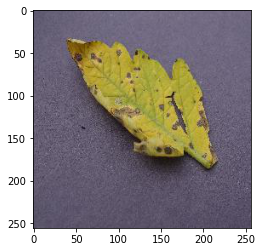

In [38]:
# Get an image to test transformations

# get a list of train png images
path = 'image_dir/'
image_list = os.listdir('image_dir')

fname = image_list[1]
image_path = path + fname

image = plt.imread(image_path)
plt.imshow(image)

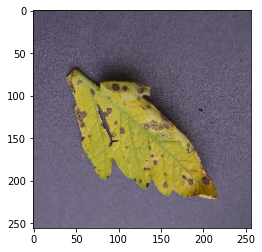

In [39]:
# Test the transformation setup.
# The image will be different each time this cell is run.

aug_image = augment_image(aug_types, image)

plt.imshow(aug_image)

In [40]:
df_train.head()

,image,target_Bacterial_spot,target_Early_blight,target_Healthy,target_Late_blight,target_Leaf_mold,target_Mosaic_virus,target_Septoria_leaf_spot,target_Spider_mites,target_Target_Spot,target_Tomato_Yellow_Leaf_Curl_Virus
1000,db9db9c3-42af-4609-a30e-48e4797174c7___GH_HL L...,0,0,1,0,0,0,0,0,0,0
1001,69468833-8b43-4e43-8ebf-b86adcaeee0d___Crnl_L....,0,0,0,0,1,0,0,0,0,0
1002,817905e4-d07e-43d3-8b2a-d7819a62abaa___Matt.S_...,0,0,0,0,0,0,1,0,0,0
1003,22cb45f2-6368-4e94-8deb-939d1f6b85ca___Crnl_L....,0,0,0,0,1,0,0,0,0,0
1004,fbd05119-3078-4761-9b2b-5291e73e85ae___Com.G_S...,0,0,0,0,0,0,0,1,0,0


In [41]:
def train_generator(batch_size=8):
    
    while True:
        
        # load the data in chunks (batches)
        for df in pd.read_csv('df_train.csv.gz', chunksize=batch_size):
            
            # get the list of images
            image_id_list = list(df['image'])
            
            # Create empty X matrix - 3 channels
            X_train = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS), dtype=np.uint8)
            

        
            
            # Create X_train
            #================
            
            for i in range(0, len(image_id_list)):
              
              
                # get the image and mask
                image_id = image_id_list[i]


                # set the path to the image
                path = 'image_dir/' + image_id

                # read the image
                image = cv2.imread(path)
                
                # convert to from BGR to RGB
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                
                # resize the image
                image = cv2.resize(image, (IMAGE_HEIGHT, IMAGE_WIDTH))
                
                
            
            
            # Create y_train
            # ===============
                cols = ["target_Bacterial_spot", 
                        "target_Early_blight",
                        "target_Late_blight",
                        "target_Leaf_mold", 
                        "target_Septoria_leaf_spot", 
                        "target_Spider_mites", 
                        "target_Target_Spot", 
                        "target_Tomato_Yellow_Leaf_Curl_Virus", 
                        "target_Mosaic_virus", 
                        "target_Healthy",]
                y_train = df[cols]
                y_train = np.asarray(y_train) 

                # change the shape to (batch_size, 1)
                #y_train = y_train.reshape((-1, 1)) # -1 tells numpy to automatically detect the batch size
       
              
            # Augment the image and mask
            # ===========================

                aug_image = augment_image(aug_types, image)
              
                # insert the image into X_train
                X_train[i] = aug_image
                
                          
                
            # Normalize the images
            X_train = X_train/255

            yield X_train, y_train

In [42]:
# Test the generator

# initialize
train_gen = train_generator(batch_size=8)

# run the generator
X_train, y_train = next(train_gen)

print(X_train.shape)
print(y_train.shape)

(8, 128, 128, 3)
(8, 10)


In [43]:
y_train

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]])

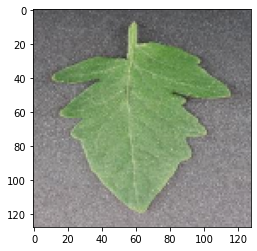

In [44]:
# Print the first image in X_train
# Remember that train images have been augmented.

image = X_train[0,:,:,:]
plt.imshow(image)

In [45]:
def val_generator(batch_size=5):
    
    while True:
        
        # load the data in chunks (batches)
        for df in pd.read_csv('df_val.csv.gz', chunksize=batch_size):
            
            # get the list of images
            image_id_list = list(df['image'])
            
            # Create empty X matrix - 3 channels
            X_val = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS), dtype=np.uint8)
            

        
            
            # Create X_val
            #================
            
            for i in range(0, len(image_id_list)):
              
              
                # get the image and mask
                image_id = image_id_list[i]


                # set the path to the image
                path = 'image_dir/' + image_id

                # read the image
                image = cv2.imread(path)
                
                # convert to from BGR to RGB
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                
                # resize the image
                image = cv2.resize(image, (IMAGE_HEIGHT, IMAGE_WIDTH))

                # insert the image into X_train
                X_val[i] = image
                
                
            
            
            # Create y_val
            # ===============

                cols = ["target_Bacterial_spot", 
                        "target_Early_blight",
                        "target_Late_blight",
                        "target_Leaf_mold", 
                        "target_Septoria_leaf_spot", 
                        "target_Spider_mites", 
                        "target_Target_Spot", 
                        "target_Tomato_Yellow_Leaf_Curl_Virus", 
                        "target_Mosaic_virus", 
                        "target_Healthy",]
                y_val = df[cols]
                y_val = np.asarray(y_val) 

                # change the shape to (batch_size, 1)
                #y_val = y_val.reshape((-1, 1)) # -1 tells numpy to automatically detect the batch size
       
            
                
                          
                
            # Normalize the images
            X_val = X_val/255

            yield X_val, y_val

In [46]:
# Test the validation generator

# initialize
val_gen = val_generator(batch_size=5)

# run the generator
X_val, y_val = next(val_gen)

print(X_val.shape)
print(y_val.shape)

(5, 128, 128, 3)
(5, 10)


In [47]:
y_val

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])

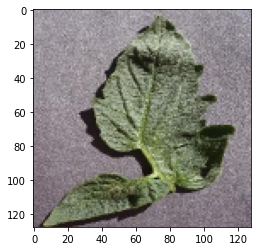

In [48]:
# print the image from X_val
image = X_val[0,:,:,:]
plt.imshow(image)

In [49]:
def test_generator(batch_size=1):
    
    while True:
        
        # load the data in chunks (batches)
        for df in pd.read_csv('df_val.csv.gz', chunksize=batch_size):
            
            # get the list of images
            image_id_list = list(df['image'])
            
            # Create empty X matrix - 3 channels
            X_test = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS), dtype=np.uint8)
            

        
            
            # Create X_test
            #================
            
            for i in range(0, len(image_id_list)):
              
              
                # get the image and mask
                image_id = image_id_list[i]


                # set the path to the image
                path = 'image_dir/' + image_id

                # read the image
                image = cv2.imread(path)
                
                # convert to from BGR to RGB
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                
                # resize the image
                image = cv2.resize(image, (IMAGE_HEIGHT, IMAGE_WIDTH))

                # insert the image into X_train
                X_test[i] = image
                
                 
                
            # Normalize the images
            X_test = X_test/255

            yield X_test

In [50]:
# Test the generator

# initialize
test_gen = test_generator(batch_size=1)

# run the generator
X_test = next(test_gen)

print(X_test.shape)

(1, 128, 128, 3)


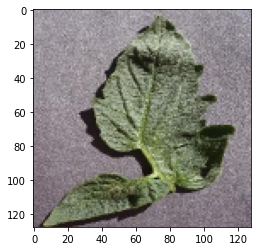

In [51]:
# print the image from X_test

image = X_test[0,:,:,:]
plt.imshow(image)

#HyperParameter

In [52]:
TRAIN_BATCH_SIZE = 8
VAL_BATCH_SIZE = 5
EPOCH = 10


num_train_samples = len(df_train)
num_val_samples = len(df_val)
train_batch_size = TRAIN_BATCH_SIZE
val_batch_size = VAL_BATCH_SIZE

# determine numtrain steps
train_steps = np.ceil(num_train_samples / train_batch_size)
# determine num val steps
val_steps = np.ceil(num_val_samples / val_batch_size)

In [53]:
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.metrics import categorical_accuracy

from tensorflow.keras.callbacks import (EarlyStopping, ReduceLROnPlateau, 
                                        ModelCheckpoint, CSVLogger, LearningRateScheduler)

%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
import numpy as np
import os
import datetime
import cv2

from tensorflow.keras.models import Sequential, load_model, save_model
from tensorflow.keras.layers import Activation, Flatten, Dropout, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.compat.v1 import RunOptions

from keras.utils.vis_utils import plot_model
from keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard, Callback, EarlyStopping

from sklearn.metrics import confusion_matrix , classification_report , accuracy_score
from sklearn.preprocessing import LabelBinarizer
from hyperactive import Hyperactive

#Baseline

In [ ]:
print(X_train.shape[1:])

(128, 128, 3)


In [ ]:
model_pretrained = Sequential()
model_pretrained.add(Conv2D(64, (3, 3), padding="same", input_shape=X_train.shape[1:]))
model_pretrained.add(Activation("relu"))
model_pretrained.add(Conv2D(32, (3, 3)))
model_pretrained.add(Activation("relu"))
model_pretrained.add(MaxPooling2D(pool_size=(2, 2)))
model_pretrained.add(Dropout(0.25))

model_pretrained.add(Conv2D(32, (3, 3), padding="same"))
model_pretrained.add(Activation("relu"))
model_pretrained.add(Dropout(0.25))

model_pretrained.add(Flatten())
model_pretrained.add(Dense(200))
model_pretrained.add(Activation("relu"))
model_pretrained.add(Dropout(0.5))
model_pretrained.add(Dense(10))
model_pretrained.add(Activation("softmax"))



In [ ]:
# Initialize the generators
train_gen = train_generator(batch_size=TRAIN_BATCH_SIZE)
val_gen = val_generator(batch_size=VAL_BATCH_SIZE)

model_pretrained.compile(
    Adam(lr=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)



filepath = "model_baseline.h5"

#earlystopper = EarlyStopping(patience=10, verbose=1)

checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, 
                             save_best_only=True, mode='max')

#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, 
                                   #verbose=1, mode='min')



log_fname = 'training_log.csv'
csv_logger = CSVLogger(filename=log_fname,
                       separator=',',
                       append=False)

callbacks_list = [checkpoint, csv_logger]

In [ ]:
%%time
history = model_pretrained.fit_generator(train_gen, steps_per_epoch=train_steps, epochs=EPOCH, 
                              validation_data=val_gen, validation_steps=val_steps,
                             verbose=1,
                             callbacks=callbacks_list)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
1250/1250 [==============================] - ETA: 0s - loss: 1.9639 - accuracy: 0.2807
Epoch 00001: val_accuracy improved from -inf to 0.62600, saving model to model_baseline.h5
1250/1250 [==============================] - 73s 58ms/step - loss: 1.9639 - accuracy: 0.2807 - val_loss: 1.2356 - val_accuracy: 0.6260
Epoch 2/10
1250/1250 [==============================] - ETA: 0s - loss: 1.3574 - accuracy: 0.5219
Epoch 00002: val_accuracy improved from 0.62600 to 0.76300, saving model to model_baseline.h5
1250/1250 [==============================] - 71s 57ms/step - loss: 1.3574 - accuracy: 0.5219 - val_loss: 0.7923 - val_accuracy: 0.7630
Epoch 3/10
1250/1250 [==============================] - ETA: 0s - loss: 1.1404 - accuracy: 0.5928
Epoch 00003: val_accuracy improved from 0.76300 to 0.82800, saving model to model_baseline.h5
1250/1250 [==============================] - 71s 57ms/step - loss: 1.1404 - accur

#ENAS

##Pretrained

In [ ]:
model_pretrained = Sequential()
model_pretrained.add(Conv2D(64, (3, 3), padding="same", input_shape=X_train.shape[1:]))
model_pretrained.add(Activation("relu"))
model_pretrained.add(Conv2D(32, (3, 3)))
model_pretrained.add(Activation("relu"))
model_pretrained.add(MaxPooling2D(pool_size=(2, 2)))
model_pretrained.add(Dropout(0.25))

model_pretrained.add(Conv2D(32, (3, 3), padding="same"))
model_pretrained.add(Activation("relu"))
model_pretrained.add(Dropout(0.25))

model_pretrained.add(Flatten())
model_pretrained.add(Dense(200))
model_pretrained.add(Activation("relu"))
model_pretrained.add(Dropout(0.5))
model_pretrained.add(Dense(10))
model_pretrained.add(Activation("softmax"))

In [ ]:
# Initialize the generators
train_gen = train_generator(batch_size=TRAIN_BATCH_SIZE)
val_gen = val_generator(batch_size=VAL_BATCH_SIZE)

model_pretrained.compile(
    Adam(lr=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)



filepath = "pretrained_model.h5"

#earlystopper = EarlyStopping(patience=10, verbose=1)

checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, 
                             save_best_only=True, mode='max')

#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, 
                                   #verbose=1, mode='min')

log_fname = 'training_log_pretrained.csv'
csv_logger = CSVLogger(filename=log_fname,
                       separator=',',
                       append=False)

callbacks_list = [csv_logger]

In [ ]:
%%time
history = model_pretrained.fit_generator(train_gen, steps_per_epoch=train_steps, epochs=EPOCH, 
                              validation_data=val_gen, validation_steps=val_steps,
                             verbose=1,
                             callbacks=callbacks_list)


Epoch 1/10
1250/1250 [==============================] - 78s 62ms/step - loss: 1.8859 - accuracy: 0.3199 - val_loss: 1.1778 - val_accuracy: 0.6440
Epoch 2/10
1250/1250 [==============================] - 77s 62ms/step - loss: 1.3287 - accuracy: 0.5330 - val_loss: 1.0950 - val_accuracy: 0.6230
Epoch 3/10
1250/1250 [==============================] - 80s 64ms/step - loss: 1.1271 - accuracy: 0.6098 - val_loss: 0.7142 - val_accuracy: 0.7710
Epoch 4/10
1250/1250 [==============================] - 80s 64ms/step - loss: 1.0359 - accuracy: 0.6346 - val_loss: 0.6050 - val_accuracy: 0.8180
Epoch 5/10
1250/1250 [==============================] - 80s 64ms/step - loss: 0.9658 - accuracy: 0.6659 - val_loss: 0.5180 - val_accuracy: 0.8380
Epoch 6/10
1250/1250 [==============================] - 79s 63ms/step - loss: 0.9177 - accuracy: 0.6807 - val_loss: 0.5272 - val_accuracy: 0.8210
Epoch 7/10
1250/1250 [==============================] - 80s 64ms/step - loss: 0.8695 - accuracy: 0.6967 - val_loss: 0.4625 -

In [ ]:
n_layers = len(model_pretrained.layers)

for i in range(n_layers - 8):
    model_pretrained.pop()

for layer in model_pretrained.layers:
    layer.trainable = False

print(model_pretrained.summary())

model_pretrained.save(filepath)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 128, 128, 64)      1792      
_________________________________________________________________
activation (Activation)      (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 126, 126, 32)      18464     
_________________________________________________________________
activation_1 (Activation)    (None, 126, 126, 32)      0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 63, 63, 32)       

##Trained

In [ ]:
# !gdown https://drive.google.com/uc?id=1-7RQvlazTEAN3_MbG1nC4wMQkEPqVyUS

Downloading...
From: https://drive.google.com/uc?id=1-7RQvlazTEAN3_MbG1nC4wMQkEPqVyUS
To: /content/pretrained_model.h5
204MB [00:01, 172MB/s]


In [ ]:
from tensorflow.keras.backend import clear_session
clear_session()
X_train = np.asarray(X_train, order="C") #fix ndarray is not C-contiguous
y_train = np.asarray(y_train, order="C") #fix ndarray is not C-contiguous


def conv1(model):
    model.add(Conv2D(filters=64,kernel_size=(3,3), padding="same", 
                     activation='relu'))
    model.add(BatchNormalization(axis=-1))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    return model


def conv2(model):
    model.add(Conv2D(filters=128,kernel_size=(3,3), padding="same", 
                     activation='relu'))
    return model


def conv3(model):
    return model

def build(x_train, y_train):
    

    def cnn(para, X_train, y_train):
        """
        model = Sequential()
        model.add(
            Conv2D(64, (3, 3), padding="same", input_shape=X_train.shape[1:])
        )
        model.add(Activation("relu"))
        model.add(Conv2D(32, (3, 3)))
        model.add(Activation("relu"))


        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.25))

        model.add(Conv2D(32, (3, 3), padding="same"))
        model.add(Activation("relu"))
        """
        
        model = load_model("pretrained_model.h5")
        print("Model Loaded!")

        model = para["conv_layer.0"](model)
        model.add(Dropout(0.25, name='drop_out'))
        
        model = para["conv_layer.1"](model)
        model.add(Dropout(0.25, name='drop_out2'))  

        model.add(Flatten())
        model.add(Dense(para["neurons.0"], activation="relu"))
        model.add(Dropout(0.5, name='drop_out3'))
        model.add(Dense(10, activation="softmax"))

        run_opts = RunOptions(report_tensor_allocations_upon_oom = True) #OOM Fix

        train_gen = train_generator(batch_size=TRAIN_BATCH_SIZE)
        val_gen = val_generator(batch_size=VAL_BATCH_SIZE)

        model.compile(
            Adam(lr=0.0001),
            loss='categorical_crossentropy',
            metrics=['accuracy'],
        )



        filepath = "model_enas.h5"

        #earlystopper = EarlyStopping(patience=10, verbose=1)

        checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, 
                                    save_best_only=True, mode='max')

        #reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, 
                                          #verbose=1, mode='min')
        


        log_fname = 'training_log_enas.csv'
        csv_logger = CSVLogger(filename=log_fname,
                              separator=',',
                              append=False)

        callbacks_list = [checkpoint, csv_logger]

        history = model.fit_generator(train_gen, steps_per_epoch=train_steps, epochs=EPOCH, 
                                      validation_data=val_gen, validation_steps=val_steps,
                                    verbose=1,
                                    callbacks=callbacks_list)

        _, score = model.evaluate(x=X_val, y=y_val)

        return score


    search_config = {
        cnn: {
            "conv_layer.0": [conv1, conv2, conv3], 
            "conv_layer.1": [conv1, conv2, conv3], 
            "neurons.0": range(100, 1000, 100)}
    }


    opt = Hyperactive(X_train, y_train, memory="long")
    opt.search(search_config, optimizer="Bayesian", n_iter=3,)

In [ ]:
%%time
build(X_train, y_train)

No meta data found for cnn function
Set random start position


Model Loaded!
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
1250/1250 [==============================] - ETA: 0s - loss: 1.2036 - accuracy: 0.6517
Epoch 00001: val_accuracy improved from -inf to 0.82300, saving model to model_enas.h5
1250/1250 [==============================] - 66s 53ms/step - loss: 1.2036 - accuracy: 0.6517 - val_loss: 0.6212 - val_accuracy: 0.8230
Epoch 2/10
1250/1250 [==============================] - ETA: 0s - loss: 0.6979 - accuracy: 0.7691
Epoch 00002: val_accuracy did not improve from 0.82300
1250/1250 [==============================] - 65s 52ms/step - loss: 0.6979 - accuracy: 0.7691 - val_loss: 0.6862 - val_accuracy: 0.8200
Epoch 3/10
1249/1250 [============================>.] - ETA: 0s - loss: 0.6027 - accuracy: 0.7998
Epoch 00003: val_accuracy improved from 0.82300 to 0.85600, saving model to model_enas.h5
1250/1250 [==============================] - 64s 51ms/step - loss: 0.6035 - accuracy: 0.7996 - val_loss: 0.5828 - 

ResourceExhaustedError: ignored

#Saving Model to GDrive

In [ ]:
#Saving model to GDrive

!cp model_baseline.h5 '/content/drive/My Drive/Bangkit/Final Project/model/V2'
!cp pretrained_model.h5 '/content/drive/My Drive/Bangkit/Final Project/model/V2'
!cp model_enas.h5 '/content/drive/My Drive/Bangkit/Final Project/model/V2'

!cp training_log.csv '/content/drive/My Drive/Bangkit/Final Project/model/V2'
!cp training_log_pretrained.csv '/content/drive/My Drive/Bangkit/Final Project/model/V2'
!cp training_log_enas.csv '/content/drive/My Drive/Bangkit/Final Project/model/V2'

#EVALUATION

##Test 

In [74]:
!gdown https://drive.google.com/uc?id=1IYRA85OklCfimAre-nTO4H7yj7JZm0FE
!gdown https://drive.google.com/uc?id=1-8DmPGQeKX6jgRiwzG347fVgWkivp6pB

Downloading...
From: https://drive.google.com/uc?id=1IYRA85OklCfimAre-nTO4H7yj7JZm0FE
To: /content/model_baseline.h5
305MB [00:02, 121MB/s] 
Downloading...
From: https://drive.google.com/uc?id=1-8DmPGQeKX6jgRiwzG347fVgWkivp6pB
To: /content/model_enas.h5
592MB [00:04, 118MB/s] 


In [10]:
model_normal = load_model("model_baseline.h5")
model_enas = load_model("model_enas.h5")

In [54]:
%%time

val_gen = val_generator(batch_size=1)

val_loss, val_acc = model_normal.evaluate_generator(val_gen, 
                        steps=len(df_val))

print("============BASELINE=================")
print('val_loss:', val_loss)
print('val_acc:', val_acc)

Instructions for updating:
Please use Model.evaluate, which supports generators.
============BASELINE=================
val_loss: 0.43431761860847473
val_acc: 0.8669999837875366
CPU times: user 54.3 s, sys: 1.44 s, total: 55.7 s
Wall time: 34.7 s


In [56]:
%%time

enas_val_loss, enas_val_acc = model_enas.evaluate_generator(val_gen, 
                        steps=len(df_val))

print("============ENAS MODEL=================")
print('val_loss:', enas_val_loss)
print('val_acc:', enas_val_acc)

============ENAS MODEL=================
val_loss: 0.2529475688934326
val_acc: 0.9330000281333923
CPU times: user 1min 12s, sys: 1.62 s, total: 1min 14s
Wall time: 48.3 s


##Confusion Matrix

In [57]:
# Function Definition

def conf_matrix(conf, label, title):

  fig, ax = plt.subplots(figsize = (7,7))
  ax.matshow(conf, cmap='Pastel1')
  plt.title(title)
  ax.set_ylabel('True Values')
  ax.set_xlabel('Predicted Values', labelpad = 10)
  ax.xaxis.set_label_position('bottom') 

  for (i, j), z in np.ndenumerate(conf):
      ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')
  
  ax.set_xticks(np.arange(10), label)
  ax.set_yticks(np.arange(10), label)

  plt.show()


In [73]:
test_gen_baseline = test_generator(batch_size=1)
baseline = model_normal.predict_generator(test_gen_baseline, steps=len(df_val), verbose=1)

test_gen_enas = test_generator(batch_size=1)
enas = model_enas.predict_generator(test_gen_enas, steps=len(df_val), verbose=1)

1000/1000 [==============================] - 52s 52ms/step


In [59]:
y_pred_baseline = np.argmax(baseline, axis=1)
y_pred_vgg = np.argmax(vgg, axis=1)
y_pred_enas = np.argmax(enas, axis=1)

# get y_true as index values

label = ["target_Bacterial_spot", 
        "target_Early_blight",
        "target_Late_blight",
        "target_Leaf_mold", 
        "target_Septoria_leaf_spot", 
        "target_Spider_mites", 
        "target_Target_Spot", 
        "target_Tomato_Yellow_Leaf_Curl_Virus", 
        "target_Mosaic_virus", 
        "target_Healthy",]
        
y_true = df_val[label]
y_true = np.asarray(y_true) 
y_true = np.argmax(y_true, axis=1)


In [60]:
from sklearn.metrics import confusion_matrix
import itertools

cm_enas = confusion_matrix(y_true, y_pred_enas)
cm_baseline = confusion_matrix(y_true, y_pred_baseline)
cm_vgg = confusion_matrix(y_true, y_pred_vgg)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Passing the minor parameter of set_yticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  app.launch_new_instance()


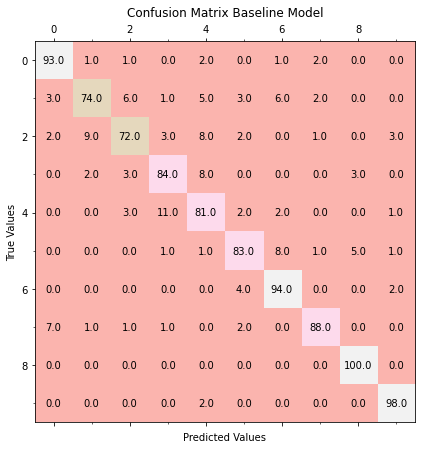

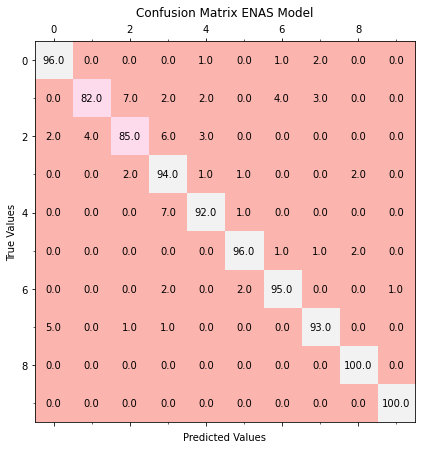

In [72]:
conf_matrix(cm_baseline, label, title='Confusion Matrix Baseline Model')
conf_matrix(cm_enas, label, title='Confusion Matrix ENAS Model')

##Classification Report (Precission, Recall, F1-Score)

Recall = Given a class, will the classifier be able to detect it?

Precision = Given a class prediction from a classifier, how likely is it to be correct?

F1 Score = The harmonic mean of the recall and precision. Essentially, it punishes extreme values.

In [62]:
from sklearn.metrics import classification_report

# Generate a classification report
report_baseline = classification_report(y_true, y_pred_baseline, target_names=["target_Bacterial_spot", 
                  "target_Early_blight",
                  "target_Late_blight",
                  "target_Leaf_mold", 
                  "target_Septoria_leaf_spot", 
                  "target_Spider_mites", 
                  "target_Target_Spot", 
                  "target_Tomato_Yellow_Leaf_Curl_Virus", 
                  "target_Mosaic_virus", 
                  "target_Healthy",])

print(report_baseline)

                                      precision    recall  f1-score   support

               target_Bacterial_spot       0.89      0.93      0.91       100
                 target_Early_blight       0.85      0.74      0.79       100
                  target_Late_blight       0.84      0.72      0.77       100
                    target_Leaf_mold       0.83      0.84      0.84       100
           target_Septoria_leaf_spot       0.76      0.81      0.78       100
                 target_Spider_mites       0.86      0.83      0.85       100
                  target_Target_Spot       0.85      0.94      0.89       100
target_Tomato_Yellow_Leaf_Curl_Virus       0.94      0.88      0.91       100
                 target_Mosaic_virus       0.93      1.00      0.96       100
                      target_Healthy       0.93      0.98      0.96       100

                            accuracy                           0.87      1000
                           macro avg       0.87      0.87     

In [64]:
# Generate a classification report
report_enas = classification_report(y_true, y_pred_enas, target_names=["target_Bacterial_spot", 
                  "target_Early_blight",
                  "target_Late_blight",
                  "target_Leaf_mold", 
                  "target_Septoria_leaf_spot", 
                  "target_Spider_mites", 
                  "target_Target_Spot", 
                  "target_Tomato_Yellow_Leaf_Curl_Virus", 
                  "target_Mosaic_virus", 
                  "target_Healthy",])

print(report_enas)

                                      precision    recall  f1-score   support

               target_Bacterial_spot       0.93      0.96      0.95       100
                 target_Early_blight       0.95      0.82      0.88       100
                  target_Late_blight       0.89      0.85      0.87       100
                    target_Leaf_mold       0.84      0.94      0.89       100
           target_Septoria_leaf_spot       0.93      0.92      0.92       100
                 target_Spider_mites       0.96      0.96      0.96       100
                  target_Target_Spot       0.94      0.95      0.95       100
target_Tomato_Yellow_Leaf_Curl_Virus       0.94      0.93      0.93       100
                 target_Mosaic_virus       0.96      1.00      0.98       100
                      target_Healthy       0.99      1.00      1.00       100

                            accuracy                           0.93      1000
                           macro avg       0.93      0.93     

## Training Plot

In [5]:

def plot_history(history, title):
  plt.figure(figsize=(16,9))
  plt.grid()
  plt.plot(history.accuracy)
  plt.plot(history.val_accuracy)

  plt.title('Model Accuracy ['+title+']')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train','Validation'], loc='upper left')
  plt.show()

  plt.figure(figsize=(16,9))
  plt.grid()
  plt.plot(history.loss)
  plt.plot(history.val_loss)

  plt.title('Model Loss ['+title+']')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train','Validation'], loc='upper right')
  plt.show()

In [7]:
!gdown https://drive.google.com/uc?id=1-LnY8obMkr75poYP_VgagLeDmJy35bLi
!gdown https://drive.google.com/uc?id=1-F03LoJsMZgcAyCMQ7E9N5ocZPNoSEwe

Downloading...
From: https://drive.google.com/uc?id=1-LnY8obMkr75poYP_VgagLeDmJy35bLi
To: /content/training_log_enas.csv
100% 834/834 [00:00<00:00, 1.48MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-FTYCMh0HoGuem2v8qpRivWGaq6hO1jW
To: /content/training_log_vgg.csv
100% 834/834 [00:00<00:00, 665kB/s]
Downloading...
From: https://drive.google.com/uc?id=1-F03LoJsMZgcAyCMQ7E9N5ocZPNoSEwe
To: /content/training_log.csv
100% 833/833 [00:00<00:00, 607kB/s]


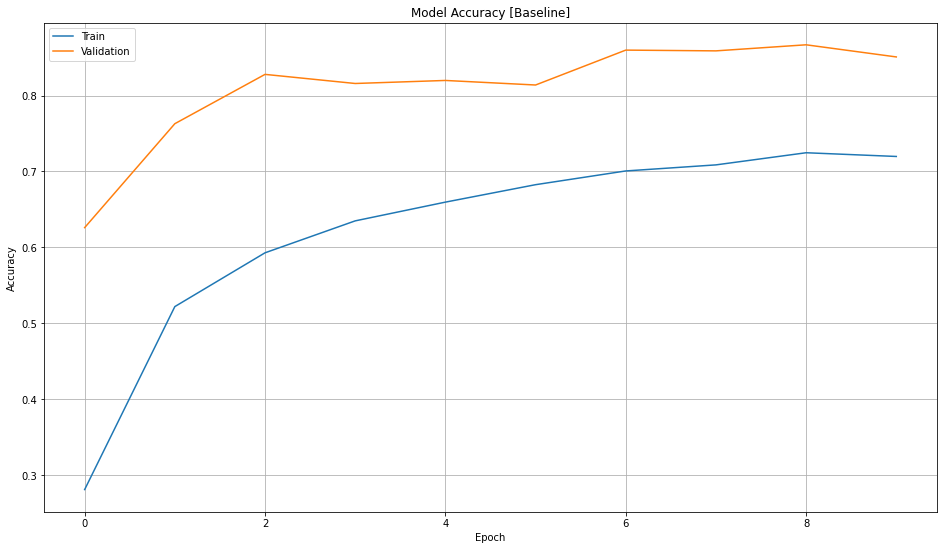

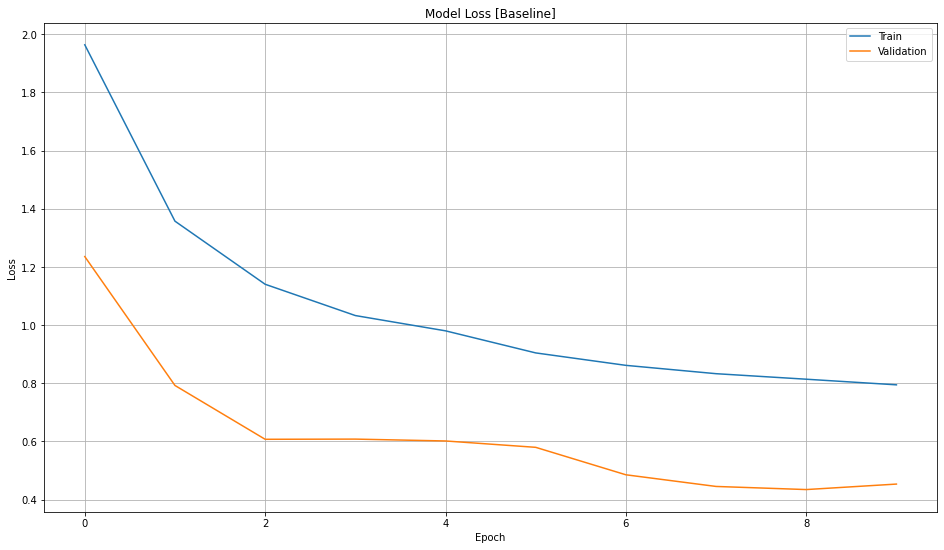

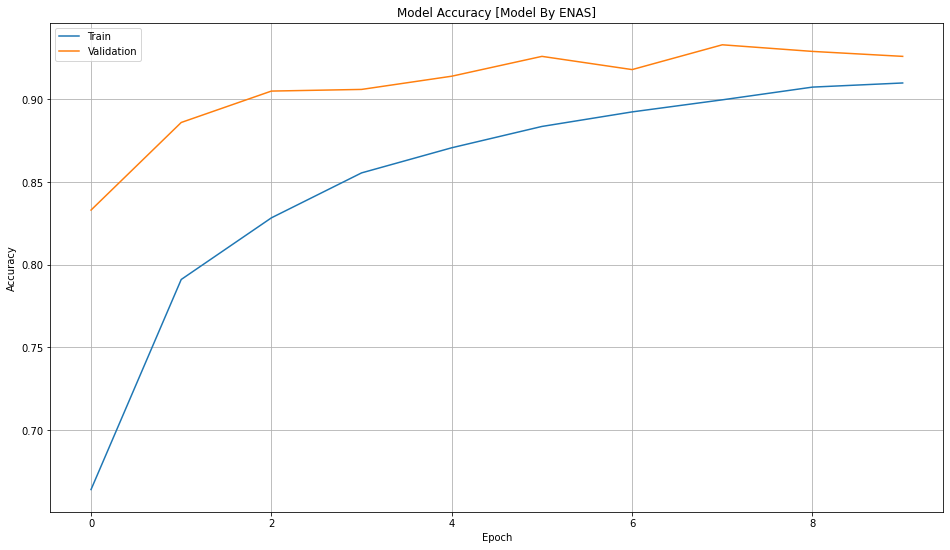

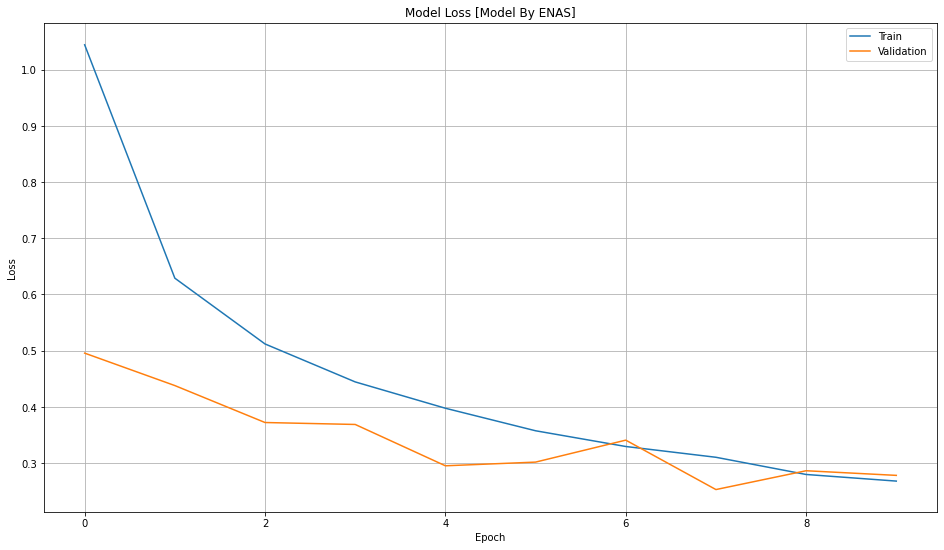

In [71]:
import pandas as pd
import numpy as np

baseline_ = pd.read_csv('training_log.csv')
plot_history(baseline_, 'Baseline')

enas_ = pd.read_csv('training_log_enas.csv')
plot_history(enas_, 'Model By ENAS')

##Test Uploaded File

In [ ]:
from google.colab import files
image = files.upload()

In [ ]:
DEFAULT_IMAGE_SIZE = tuple((128,128))

def img_to_np(DIR,flatten=True):
  #canny edge detection by resizing
  cv_img=mpimg.imread(DIR,0)
  cv_img=cv2.resize(cv_img,DEFAULT_IMAGE_SIZE)
  img = np.uint8(cv_img)
  #img = np.uint8((0.2126 * img[:,:,0]) + np.uint8(0.7152 * img[:,:,1]) + np.uint8(0.0722 * img[:,:,2]))
  #flatten it
  if(flatten):
    img=img.flatten()
  return img

In [ ]:
labels = ["Bacterial_spot", 
          "Early_blight",
          "Late_blight",
          "Leaf_mold", 
          "Septoria_leaf_spot", 
          "Spider_mites", 
          "Target_Spot", 
          "Tomato_Yellow_Leaf_Curl_Virus", 
          "Mosaic_virus", 
          "Healthy",]

arr=img_to_np("/content/septoria.jpg",flatten=False)
arr=arr.reshape(1,IMAGE_WIDTH,IMAGE_HEIGHT,IMAGE_CHANNELS)

pred_baseline = model_enas.predict(arr)[0]
pred_enas = model_normal.predict(arr)[0]

print('The Baseline Model predict the picture as', labels[np.argmax(pred_baseline)])
print('The New Model predict the picture as', labels[np.argmax(pred_enas)])

#Convert File to TFLite

In [65]:
import tensorflow as tf
converter = tf.lite.TFLiteConverter.from_keras_model(model_enas) 
tfmodel = converter.convert() 
open ('model_enas.tflite' , "wb") .write(tfmodel)

197322280

In [67]:
!cp model_enas.tflite '/content/drive/My Drive/Bangkit/Final Project/model/V2'
!cp model_vgg.tflite '/content/drive/My Drive/Bangkit/Final Project/model/V2'

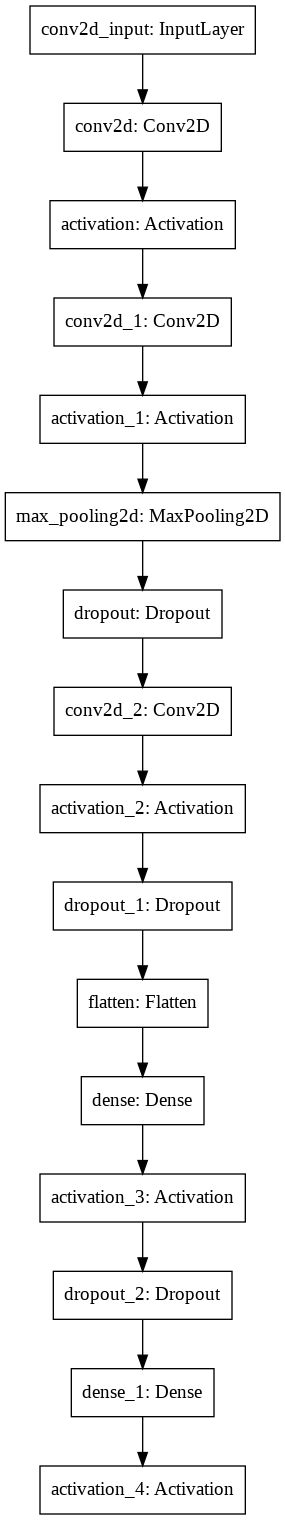

In [69]:
from tensorflow.keras.utils import plot_model

plot_model(model_normal)

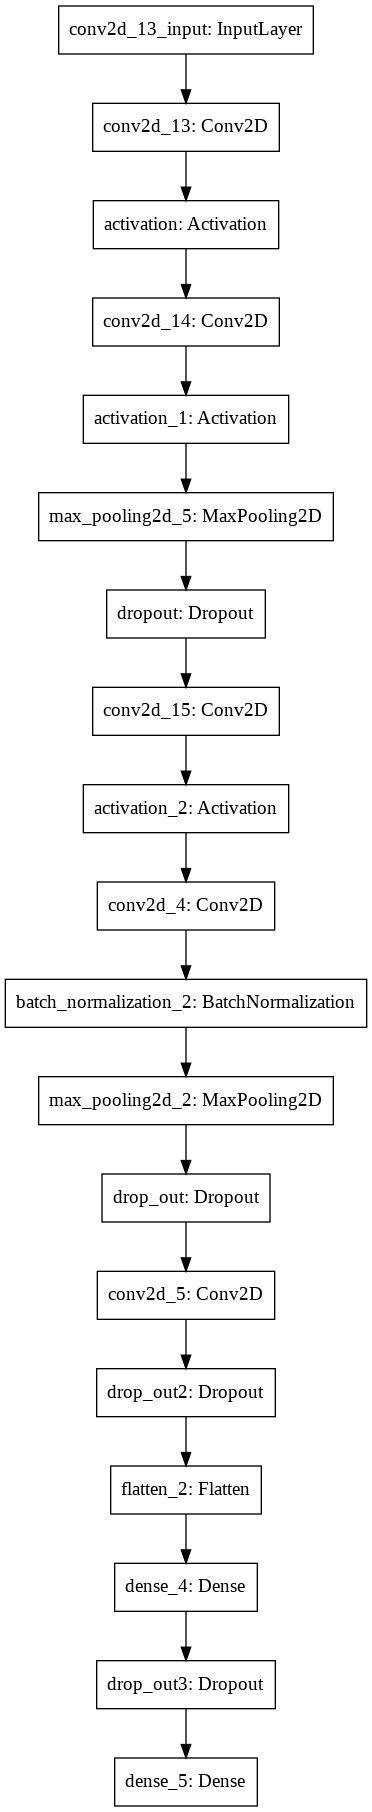

In [70]:
plot_model(model_enas)